<a href="https://colab.research.google.com/github/ilmechaJu/keras/blob/main/Keras_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%95%99%EC%8A%B5%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [10]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seq(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1. #특정 index에 대해서만 1.0으로 만듦!

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### 2가지의 모델 설정

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000,), name = 'input'),
                      Dense(16, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000,), name='input'),
                      Dense(7, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [16]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 8)                 80008     
_________________________________________________________________
hidden (Dense)               (None, 8)                 72        
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

#### 2개의 모델 학습

In [21]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4704 - acc: 0.8208 - val_loss: 0.3510 - val_acc: 0.8782
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2708 - acc: 0.9065 - val_loss: 0.2873 - val_acc: 0.8896
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2070 - acc: 0.9275 - val_loss: 0.2925 - val_acc: 0.8816
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1705 - acc: 0.9399 - val_loss: 0.2901 - val_acc: 0.8839
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1467 - acc: 0.9484 - val_loss: 0.3021 - val_acc: 0.8832
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1282 - acc: 0.9561 - val_loss: 0.3276 - val_acc: 0.8761
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1122 - acc: 0.9600 - val_loss: 0.3443 - val_acc: 0.8738
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.0976 - a

In [22]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 38ms/step - loss: 0.5155 - acc: 0.8142 - val_loss: 0.4088 - val_acc: 0.8658
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3173 - acc: 0.8998 - val_loss: 0.3126 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2372 - acc: 0.9204 - val_loss: 0.2856 - val_acc: 0.8886
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1978 - acc: 0.9299 - val_loss: 0.2813 - val_acc: 0.8883
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1713 - acc: 0.9400 - val_loss: 0.2845 - val_acc: 0.8872
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1523 - acc: 0.9474 - val_loss: 0.2938 - val_acc: 0.8848
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1365 - acc: 0.9536 - val_loss: 0.3072 - val_acc: 0.8814
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1228 - a

#### 비교

In [24]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

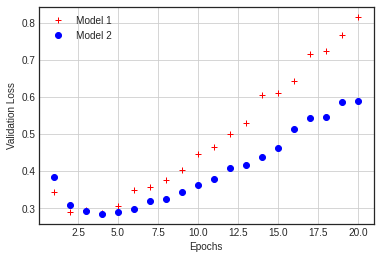

In [15]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [16]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000, ), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'),
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [17]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5046 - acc: 0.7886 - val_loss: 0.3314 - val_acc: 0.8556
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2341 - acc: 0.9095 - val_loss: 0.3322 - val_acc: 0.8656
Epoch 3/20
49/49 [==============================] - 1s 31ms/step - loss: 0.1259 - acc: 0.9546 - val_loss: 0.3608 - val_acc: 0.8764
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.4668 - val_acc: 0.8834
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1316 - acc: 0.9844 - val_loss: 0.4566 - val_acc: 0.8812
Epoch 6/20
49/49 [==============================] - 1s 31ms/step - loss: 8.2149e-04 - acc: 1.0000 - val_loss: 0.6780 - val_acc: 0.8835
Epoch 7/20
49/49 [==============================] - 2s 31ms/step - loss: 4.8237e-05 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.8825
Epoch 8/20
49/49 [==============================] - 2s 32ms/step - loss: 4.

#### 시각화

In [18]:
model_3_val_loss = model_3_hist.history['val_loss']

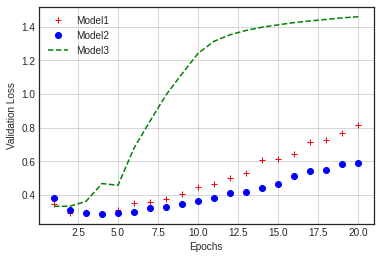

In [21]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

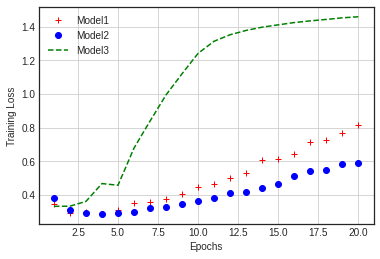

In [22]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_val_loss, 'r+', label='Model1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model3')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [24]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10,10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation("softmax")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 30)            330       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 30)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             31        
_________________________________________________________________
activation (Activation)      (None, 10, 1)             0         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [27]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [28]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [29]:
from tensorflow.keras.optimizers import Adagrad

In [30]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [31]:
from tensorflow.keras.optimizers import RMSprop

In [32]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [34]:
from tensorflow.keras.optimizers import Adam

In [35]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [36]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


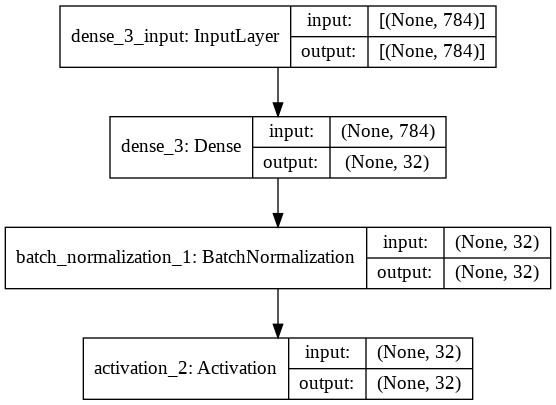

In [38]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28,), kernel_initializer='he_normal'))
model.add(BatchNormalization()) #dense와 activation 사이에 끼워서 generalization 잘되게 해줌.
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [40]:
from tensorflow.keras.regularizers import l1,l2,l1_l2

#### 모델 구성

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


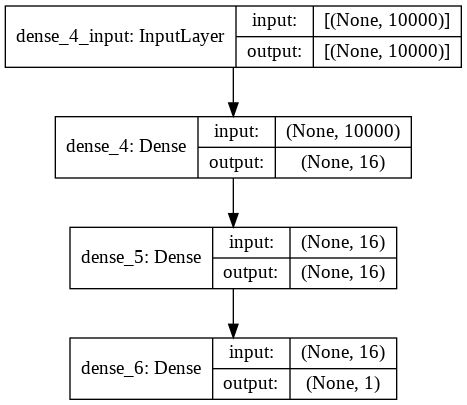

In [41]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [42]:
#튀는거(=overfitting) 잡아줌
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5180 - acc: 0.8176 - val_loss: 0.4042 - val_acc: 0.8758
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3355 - acc: 0.9010 - val_loss: 0.3443 - val_acc: 0.8867
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2845 - acc: 0.9163 - val_loss: 0.3306 - val_acc: 0.8892
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2592 - acc: 0.9260 - val_loss: 0.3406 - val_acc: 0.8816
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2477 - acc: 0.9309 - val_loss: 0.3385 - val_acc: 0.8836
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2353 - acc: 0.9350 - val_loss: 0.3512 - val_acc: 0.8802
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2309 - acc: 0.9373 - val_loss: 0.3602 - val_acc: 0.8767
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2229 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

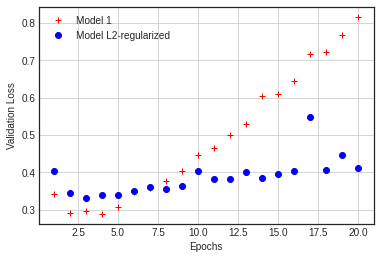

In [45]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label="Model L2-regularized")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

#### L1과 비교

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


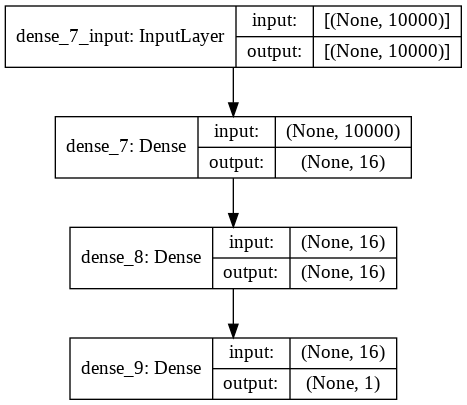

In [46]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l1(0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [47]:
#튀는거(=overfitting) 잡아줌
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 39ms/step - loss: 0.5704 - acc: 0.8070 - val_loss: 0.4374 - val_acc: 0.8777
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3824 - acc: 0.8926 - val_loss: 0.3734 - val_acc: 0.8889
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3402 - acc: 0.9030 - val_loss: 0.3613 - val_acc: 0.8879
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3220 - acc: 0.9077 - val_loss: 0.3648 - val_acc: 0.8844
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3115 - acc: 0.9128 - val_loss: 0.3639 - val_acc: 0.8854
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3062 - acc: 0.9134 - val_loss: 0.3630 - val_acc: 0.8861
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3017 - acc: 0.9157 - val_loss: 0.3716 - val_acc: 0.8814
Epoch 8/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2936 - a

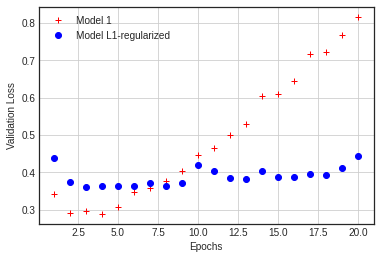

In [51]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label="Model L1-regularized")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

3가지 모델 비교
- Original
- L1
- L2

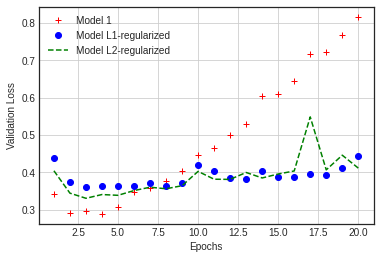

In [52]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label="Model L1-regularized")
plt.plot(epochs, l2_model_val_loss, 'g--', label="Model L2-regularized")

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

#### L1, L2와 비교

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


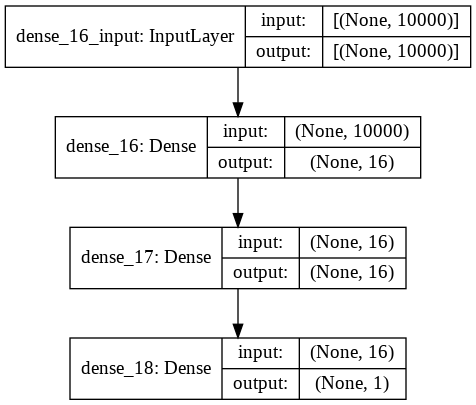

In [57]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                               activation='relu', input_shape=(10000, )),
                        Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                               activation='relu'),
                        Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_l2_model.summary()
plot_model(l1_l2model, show_shapes=True)

In [58]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.5826 - acc: 0.8064 - val_loss: 0.4454 - val_acc: 0.8741
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3888 - acc: 0.8892 - val_loss: 0.3765 - val_acc: 0.8875
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3407 - acc: 0.9020 - val_loss: 0.3760 - val_acc: 0.8775
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3242 - acc: 0.9065 - val_loss: 0.3581 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3135 - acc: 0.9118 - val_loss: 0.3601 - val_acc: 0.8864
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3098 - acc: 0.9124 - val_loss: 0.3647 - val_acc: 0.8838
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3023 - acc: 0.9169 - val_loss: 0.3931 - val_acc: 0.8762
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3010 - a

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

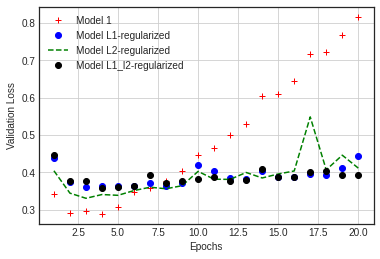

In [60]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label="Model L1-regularized")
plt.plot(epochs, l2_model_val_loss, 'g--', label="Model L2-regularized")
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label="Model L1_l2-regularized")


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [7]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model


#### 모델 구성

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


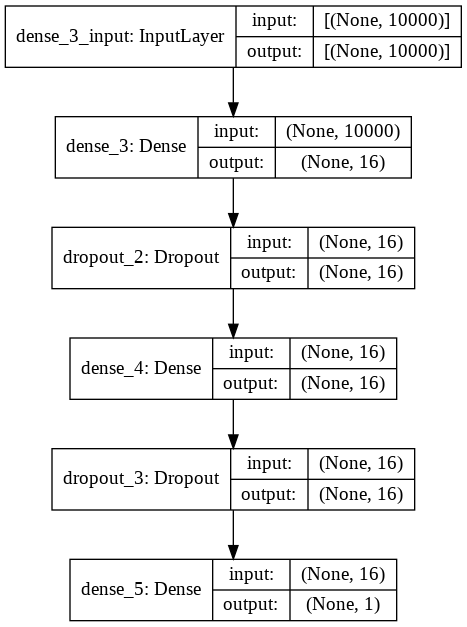

In [8]:
dropout_model = Sequential([Dense(16, activation='relu', input_shape=(10000, )),
                          Dropout(0.5),
                          Dense(16, activation='relu'),
                          Dropout(0.5),
                          Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

#### 모델 학습

In [11]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 34ms/step - loss: 0.5991 - acc: 0.6825 - val_loss: 0.4619 - val_acc: 0.8656
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4513 - acc: 0.8126 - val_loss: 0.3410 - val_acc: 0.8829
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3641 - acc: 0.8621 - val_loss: 0.2992 - val_acc: 0.8855
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3015 - acc: 0.8936 - val_loss: 0.2764 - val_acc: 0.8905
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2624 - acc: 0.9104 - val_loss: 0.2778 - val_acc: 0.8900
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2343 - acc: 0.9241 - val_loss: 0.2843 - val_acc: 0.8879
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2085 - acc: 0.9317 - val_loss: 0.3111 - val_acc: 0.8873
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1949 - a

#### 시각화

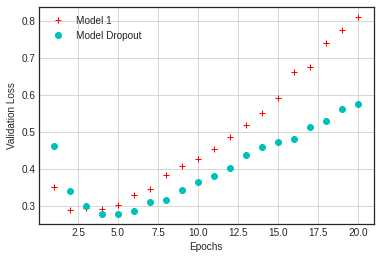

In [25]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co', label="Model Dropout")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()